# Automobile Price Prediction - Regression

As part of my study for regression analysis, I am using Automobile Data set from UCI Machine Learning Repository 
https://archive.ics.uci.edu/ml/datasets/automobile to predict the price based on several features.

First import the required libraries

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load Dataset

In [102]:
df = pd.read_csv('Automobile price data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Check missing values

In [104]:
df[df=='?'].count()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since there is a significant total number of missing values for column normalized-losses, it will be better to drop-off the column completely while for other features with missing values will be a row-wise deletion only. 

In [105]:
df = df.drop('normalized-losses', axis = 1)
df = df.replace('?', pd.np.nan)
df = df.dropna(axis=0, how='any')

In [106]:
df.shape

(193, 25)

One feature and 12 data rows have been deleted as a result

# Data Exploration and Visualization

In [132]:
df['num-of-cylinders'].value_counts()

four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

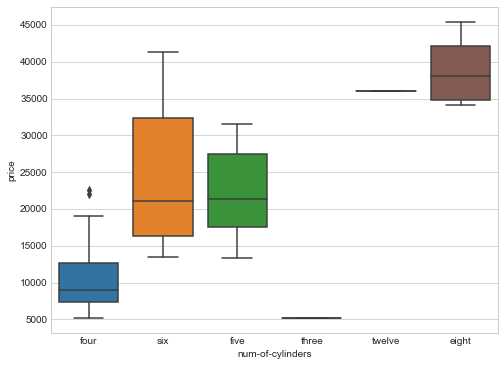

In [108]:
plt.figure(figsize = (8,6))
y = df['price'].astype(float)
sns.boxplot(x = 'num-of-cylinders', y = y, data=df)

In [109]:
df['body-style'].value_counts()

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64

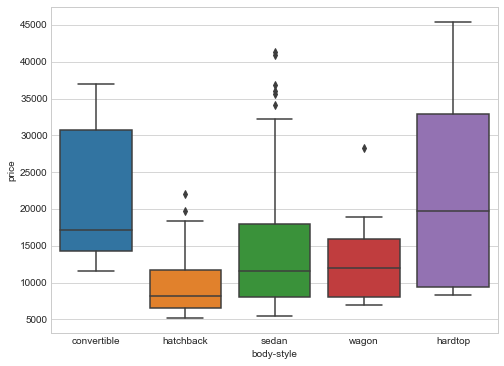

In [110]:
plt.figure(figsize = (8,6))
y = df['price'].astype(float)
sns.boxplot(x = 'body-style', y = y, data=df)

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Count')

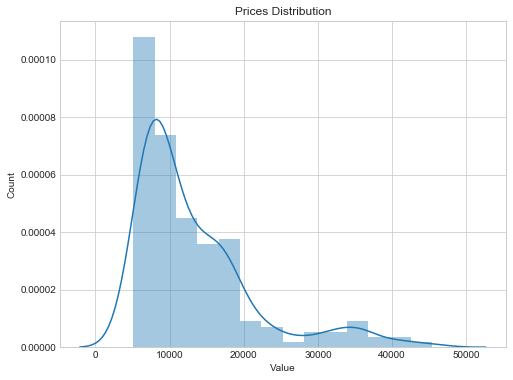

In [111]:
plt.figure(figsize=(8,6))
sns.distplot(df['price'].astype(float))
plt.title('Prices Distribution')
plt.xlabel('Value')
plt.ylabel('Count')

Convert categorical variable using one-hot encoding using the get_dummies from pandas library.

In [154]:
df = pd.get_dummies(data=df, columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style','drive-wheels', 
                                          'engine-type', 'engine-location','num-of-cylinders','fuel-system'])         

Convert object type variable to a numerical type.

In [155]:
df[['symboling','wheel-base','bore','length', 'width', 'height', 'stroke', 'curb-weight', 
             'engine-size', 'bore', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg','horsepower', 
             'peak-rpm', 'price']] = df[['symboling','wheel-base','bore','length', 'width', 'height', 'stroke', 'curb-weight', 
             'engine-size', 'bore', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg','horsepower', 
             'peak-rpm', 'price']].astype(float)

Normalize data

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [157]:
df[['symboling','wheel-base','bore','length', 'width', 'height', 'stroke', 'curb-weight', 
             'engine-size', 'bore', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg','horsepower', 
             'peak-rpm', 'price']] = scaler.fit_transform(df[['symboling','wheel-base','bore','length', 'width', 'height', 'stroke', 'curb-weight', 
             'engine-size', 'bore', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg','horsepower', 
             'peak-rpm', 'price']])

Prepare the input variable and the output variable

In [159]:
x = df.drop('price', axis =1)
y = df_num_norm['price']

Prepare train and test set

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [162]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (135, 69)
y_train:  (135,)
X_test:  (58, 69)
y_test:  (58,)


# Building Model

Using Random Forest

In [163]:
from sklearn.ensemble import RandomForestRegressor

In [164]:
rfr = RandomForestRegressor(n_estimators=30, )

In [165]:
pred_train = rfr.fit(X_train, y_train).predict(X_train)
pred_test = rfr.fit(X_train, y_train).predict(X_test)

In [166]:
from sklearn.metrics import r2_score

In [167]:
print('Train Accuracy:', r2_score(y_train, pred_train))
print('Train Accuracy:', r2_score(y_test, pred_test))

Train Accuracy: 0.9876115336469876
Train Accuracy: 0.9126588920784198


In [168]:
from sklearn.model_selection import KFold, cross_val_predict

In [169]:
rfr.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [170]:
cv = KFold(n_splits=20)
prediction_cv = cross_val_predict(rfr, x, y, cv=cv)

In [171]:
print('Train Accuracy:', r2_score(y, prediction_cv))

Train Accuracy: 0.74328706899828


In [146]:
from sklearn.ensemble import AdaBoostRegressor

In [147]:
abr = AdaBoostRegressor()

In [148]:
abr.fit(x,y)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [159]:
cv = KFold(n_splits=20)
prediction_cv1 = cross_val_predict(abr, x, y, cv=cv)

In [160]:
print('Train Accuracy:', r2_score(y, prediction_cv1))

Train Accuracy: 0.7970087779269365


In [161]:
from sklearn.ensemble import GradientBoostingRegressor

In [162]:
gbr = GradientBoostingRegressor()

In [163]:
gbr.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [164]:
cv = KFold(n_splits=20)
prediction_cv2 = cross_val_predict(gbr, x, y, cv=cv)

In [165]:
print('Train Accuracy:', r2_score(y, prediction_cv2))

Train Accuracy: 0.8182550213216123


In [166]:
from sklearn.ensemble import BaggingRegressor

In [167]:
bg = BaggingRegressor(n_estimators=30)

In [168]:
bg.fit(x,y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [170]:
cv = KFold(n_splits=20)
prediction_cv3 = cross_val_predict(bg, x, y, cv=cv)

In [171]:
print('Train Accuracy:', r2_score(y, prediction_cv3))

Train Accuracy: 0.7976032951860371


In [172]:
from sklearn.neural_network import MLPRegressor

In [173]:
mlp = MLPRegressor()

In [174]:
mlp.fit(x,y)

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [175]:
cv = KFold(n_splits=20)
prediction_cv4 = cross_val_predict(mlp, x, y, cv=cv)

C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
C:\Users\fajanilanNB\AppData\Local\Continuum\Anaconda3.5\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached

In [176]:
print('Train Accuracy:', r2_score(y, prediction_cv4))

Train Accuracy: 0.2112592313912649
